In [1]:
import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from PIL import Image

import numpy as np

import copy
import pickle
import os

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
with open('./pretrained/ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

# load a target image

In [3]:
path = './data/crop/'

In [4]:
os.listdir(path)

['after1_crop.jpg',
 'after2_crop.jpg',
 'after3_crop.jpg',
 'after4_crop.jpg',
 'after5_crop.jpg',
 'after6_crop.jpg',
 'before1_crop.jpg',
 'before2_crop.jpg',
 'before3_crop.jpg',
 'before4_crop.jpg',
 'before5_crop.jpg',
 'before6_crop.jpg']

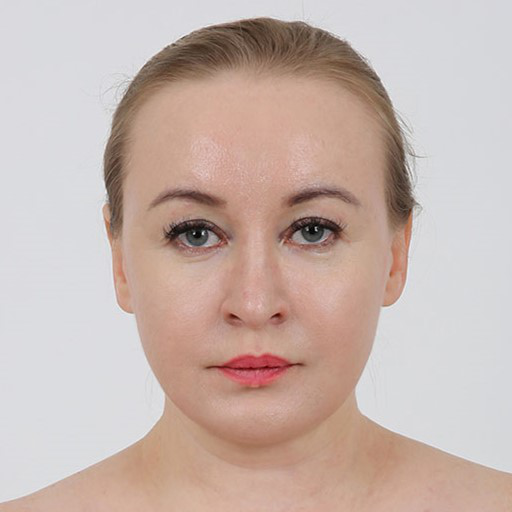

In [5]:
sample_face_path = path + 'after1_crop.jpg'
target_img = Image.open(sample_face_path).convert('RGB')
target_img

# transform image file to numpy array

In [6]:
target_img.size

(512, 512)

In [7]:
target_uint8 = np.array(target_img, dtype=np.uint8)
target_uint8.shape

(512, 512, 3)

In [8]:
target_uint8[0]

array([[218, 217, 222],
       [218, 217, 222],
       [218, 217, 222],
       ...,
       [213, 214, 219],
       [213, 214, 219],
       [213, 214, 219]], dtype=uint8)

#  4-c. load the pre-trained Generator

In [9]:
device = torch.device('cuda')
G_eval = copy.deepcopy(G).eval().requires_grad_(False).to(device) # use g as the evaluation mode (do not track gradients)

## Compute w stats

In [20]:
seed = 7

In [21]:
torch.manual_seed(seed)
np.random.seed(seed)

In [22]:
z_samples = np.random.randn(10000, G_eval.z_dim) # G_eval.z_dim == 512, (10000,512)
w_samples = G_eval.mapping(torch.from_numpy(z_samples).to(device), None)
w_samples.size()

torch.Size([10000, 18, 512])

In [23]:
z_samples

array([[ 1.6905257 , -0.46593737,  0.03282016, ...,  0.17668935,
        -0.87632243, -1.77930871],
       [-1.28195818, -1.84122213,  1.59963243, ..., -1.46677647,
         0.41640753, -0.41838182],
       [ 0.13570746,  0.85819987, -0.37088578, ...,  0.63157359,
        -1.52028854,  1.07704615],
       ...,
       [-0.17329974,  0.09709368, -0.67286469, ...,  1.774807  ,
         0.32133773,  0.64012212],
       [-1.0006209 , -1.13930733, -0.96217142, ...,  2.47012257,
         0.88991441, -0.2942701 ],
       [-0.76560203,  2.1766332 ,  0.59320903, ..., -0.12256715,
        -0.28406692,  2.23487355]])

In [24]:
w_samples.shape

torch.Size([10000, 18, 512])

In [25]:
w_samples_test = w_samples[:,:,:].cpu().numpy().astype(np.float32)
w_samples_test

array([[[ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02],
        [ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02],
        [ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02],
        ...,
        [ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02],
        [ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02],
        [ 1.09884694e-01, -1.52439028e-02,  8.32211599e-03, ...,
         -5.78562953e-02,  3.78759593e-01,  5.11739664e-02]],

       [[-1.37099465e-02,  1.71706665e+00,  1.98266018e-04, ...,
         -2.18623430e-01, -1.40524566e-01, -2.91050412e-02],
        [-1.37099465e-02,  1.71706665e+00,  1.98266018e-04, ...,
         -2.18623430e-01, -1.40524566e

In [26]:
w_avg_test = np.mean(w_samples_test, axis=0, keepdims=True) 
w_avg_test.shape # mean of w_samples

(1, 18, 512)

In [27]:
w_avg_test = torch.from_numpy(w_avg_test).to(device)

In [28]:
img = G_eval.synthesis(w_avg_test)
img = img.cpu()
img = img.squeeze(0)
img.size()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


torch.Size([3, 1024, 1024])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


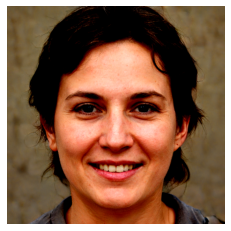

In [29]:
plt.imshow((img+0.3).permute(1,2,0))
plt.axis('off')
plt.show()